<a href="https://colab.research.google.com/github/surajkc1/AI_Assignment3/blob/main/ClusteringSKC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #pandas for dataframes
from sklearn.linear_model import LinearRegression #sklearn.linear_model for the Linear Regression model 
import sklearn.metrics as metrics #to measure model performance
import matplotlib.pyplot as plt #for plotting
from sklearn.cluster import KMeans #for kmeans algorithm

plt.rcParams['figure.figsize'] = [15,8] #defining plot size


The data we are using is from heart attack analysis and prediction data set. In the data used,
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
df = pd.read_csv("/content/heart.csv") 

A we are trying to submit data for clustering, our areas of interest are age, resting blood pressure, cholestrol and maximum heart rate achieved. We will be using these attributes for making the clusters.

In [ ]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

We must scale the continuous features in order to give each feature equal weight. Due to the fact that the feature matrix contains both binary and continuous features, we will be employing scikit-MinMaxScaler. learn's StandardScaler is one of the options.

In [ ]:
mms = MinMaxScaler()
mms.fit(df)
df_transformed = mms.transform(df)

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

K means clustering is an unsupervised learning algorithm used to group the unlabelled data set into different clusters/subsets. K defines the number of clusters to be created in the process of clustering. K-means clustering uses centroid-based algorithm that means each cluster is associated with a centroid.

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

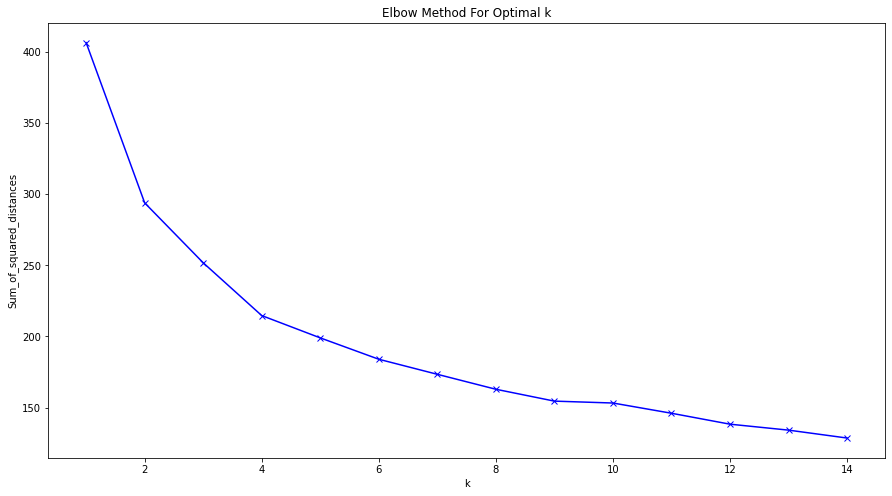

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In above plot, elbow is at k=4 indicating the optimal clusters fir the dataset.

In [ ]:
df_numeric = df[['age','trtbps']]
df_numeric.head()

,age,trtbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120


Using age and resting blood pressure for the cluster plotting in scatter plots.

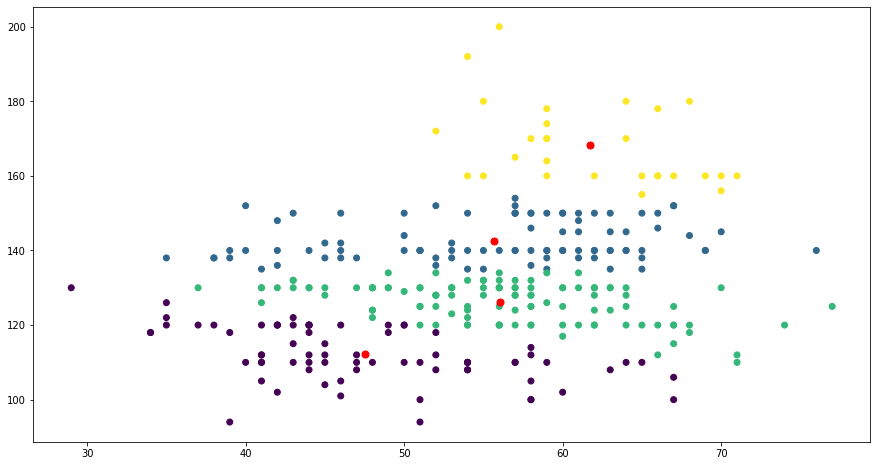

--------------
Cluster: 1: [ 47.51351351 112.18918919]
Cluster: 2: [ 55.63736264 142.67032967]
Cluster: 3: [ 56.05454545 126.20909091]
Cluster: 4: [ 61.71428571 168.35714286]


In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++',random_state=0)
pred_y = kmeans.fit_predict(df_numeric)
plt.scatter(df_numeric['age'], df_numeric['trtbps'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

print("--------------")

count = 1
for c in kmeans.cluster_centers_:
  print("Cluster: " + str(count) + ": " + str(c))
  count = count + 1

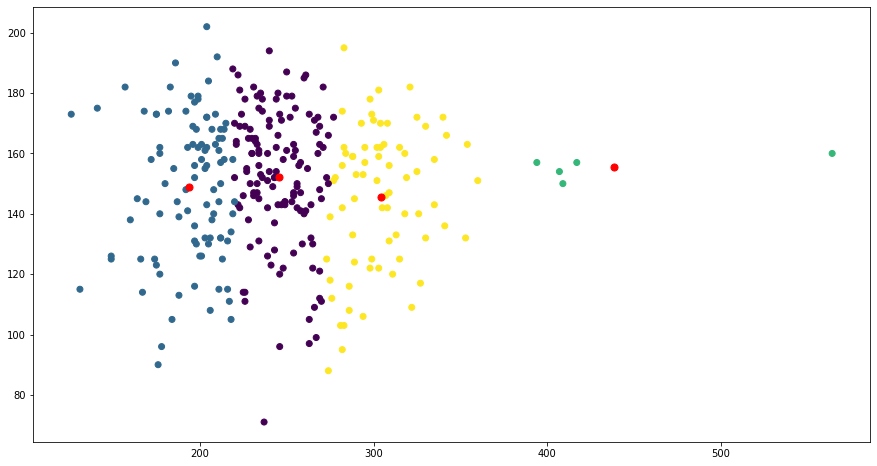

--------------
Cluster: 1: [245.56923077 152.33076923]
Cluster: 2: [193.82291667 148.76041667]
Cluster: 3: [438.2 155.6]
Cluster: 4: [304.11111111 145.56944444]


In [ ]:
df_numeric = df[['chol','thalachh']]

k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
pred_y = kmeans.fit_predict(df_numeric)
plt.scatter(df_numeric['chol'], df_numeric['thalachh'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()


print("--------------")

count = 1
for c in kmeans.cluster_centers_:
  print("Cluster: " + str(count) + ": " + str(c))
  count = count + 1

Using cholestrol and maximum heart rate achieved as the attributes for the cluster making.